## Pregunta 0

¿Qué robot tarda menos de media en inspeccionar un Trasto?

In [234]:
import pandas


df_robot_A = pandas.read_csv("robot_A.csv")
mean_robot_A = df_robot_A["minutes"].mean()

df_robot_B = pandas.read_csv("robot_B.csv")
mean_robot_B = df_robot_B["minutes"].mean()

print("La media del robot A es {0}".format(mean_robot_A))
print("La media del robot B es {0}".format(mean_robot_B))
print("El robot que tarda menos de media es el robot B")

La media del robot A es 9.785915175088867
La media del robot B es 6.5666829403453155
El robot que tarda menos de media es el robot B


## Pregunta 1

¿Cómo podemos presentar visualmente los datos para sacar conclusiones útiles?

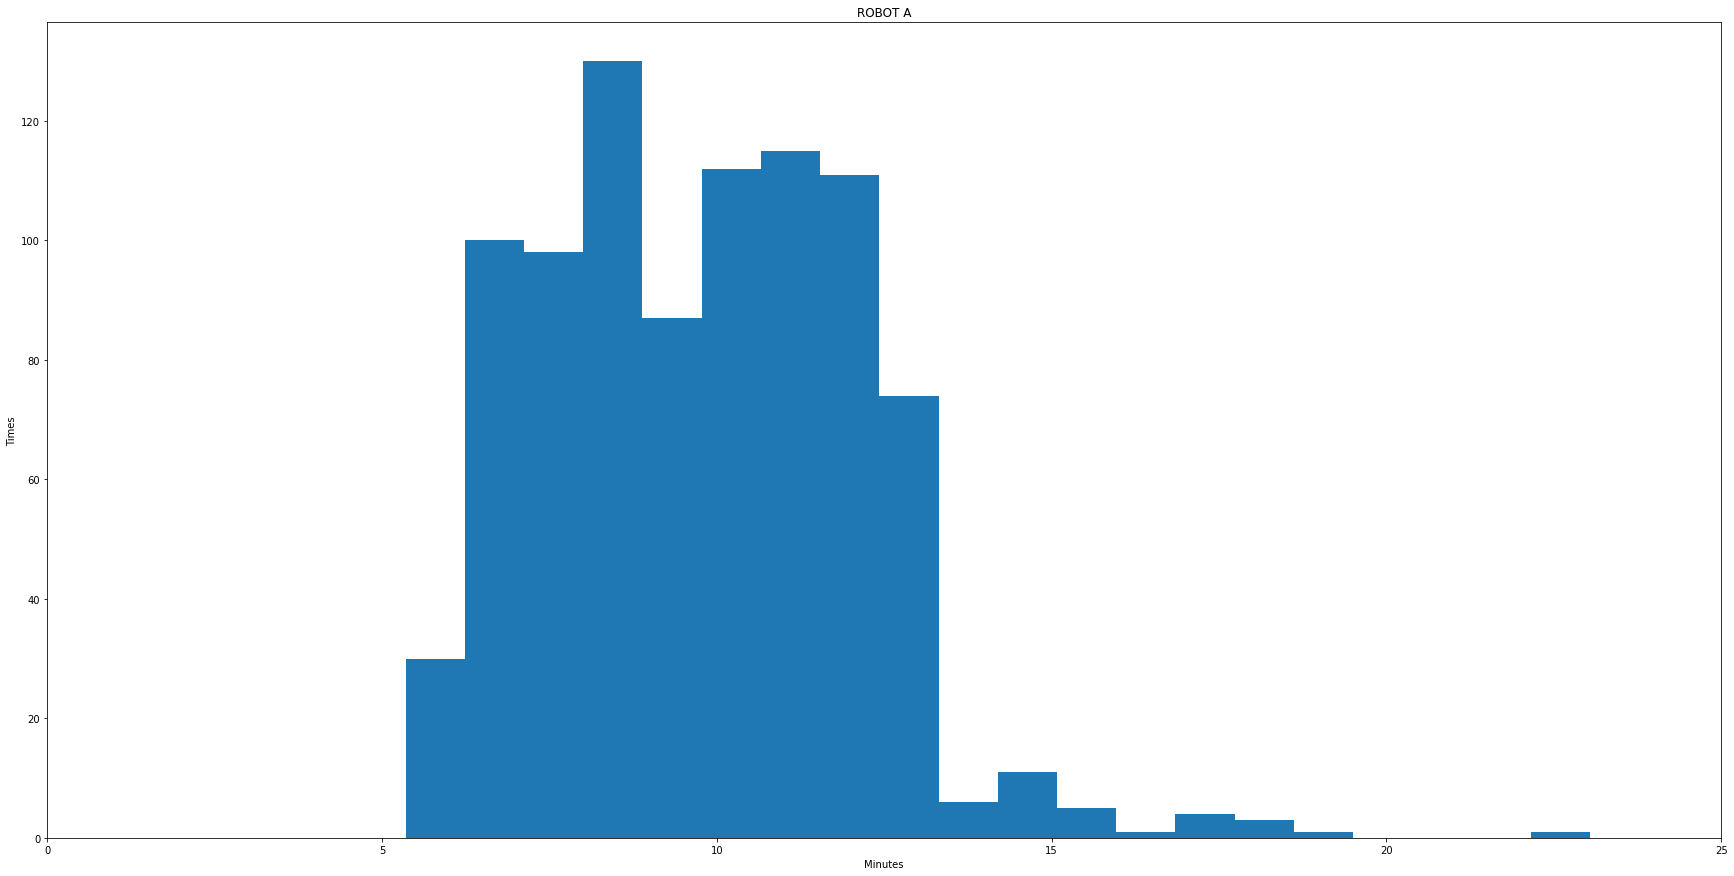

In [235]:
import matplotlib.pyplot as plt


plt.figure(figsize=(30, 15))
plt.xlabel("Minutes")
plt.ylabel("Times")
plt.title("ROBOT A")
plt.xlim(0,25)
_ = plt.hist(df_robot_A, bins=20)

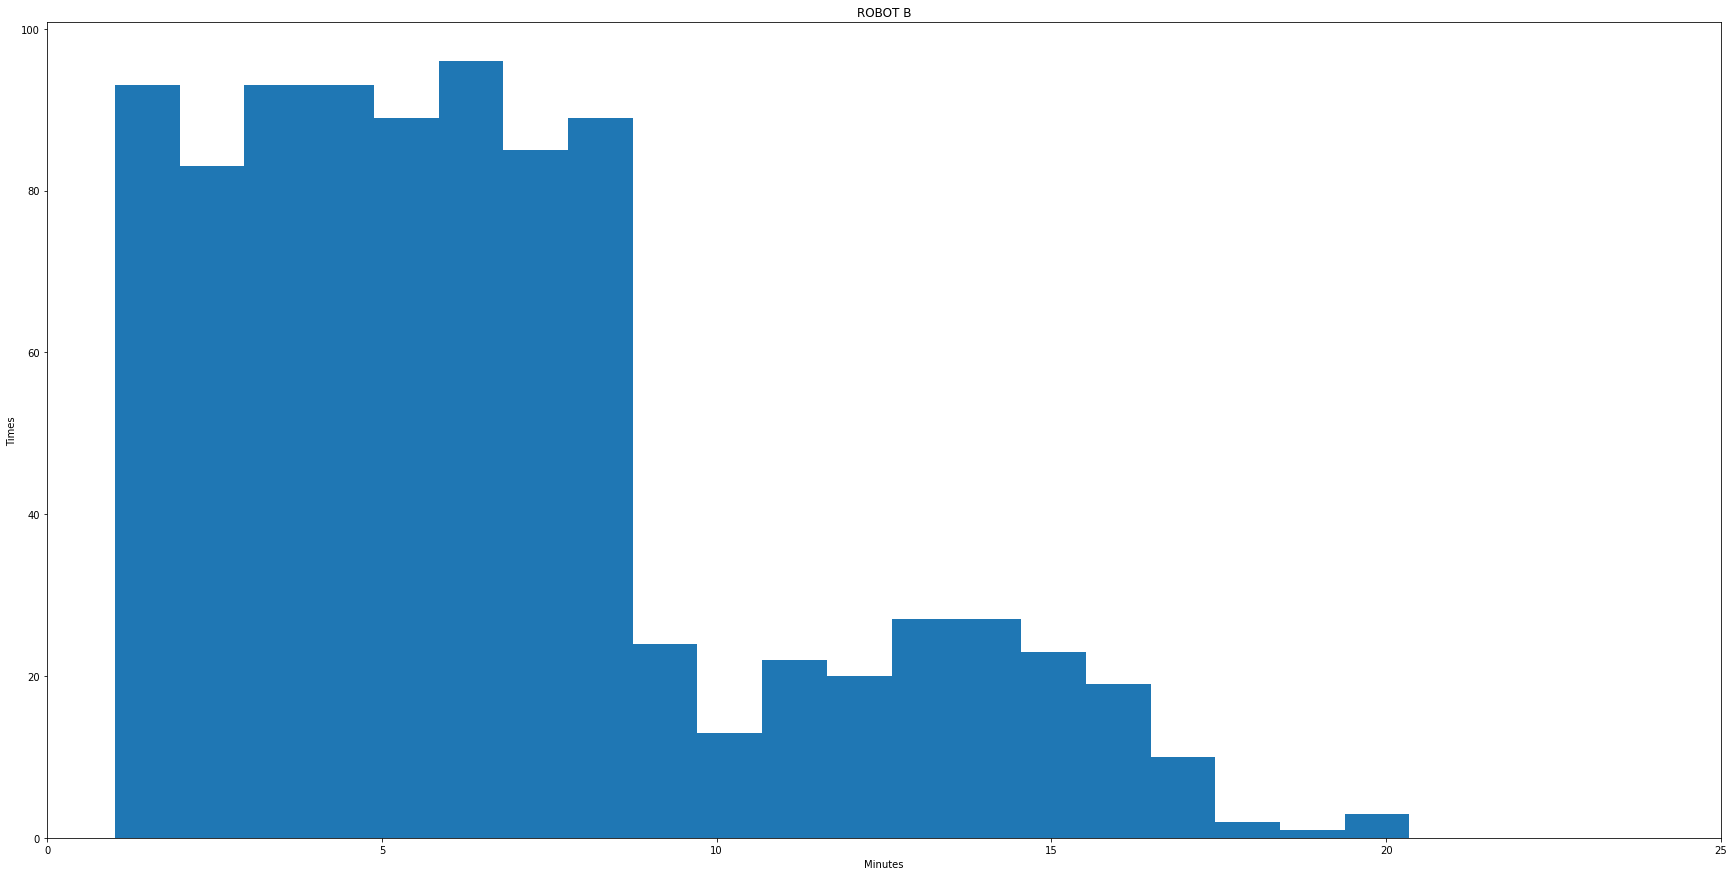

In [236]:
plt.figure(figsize=(30, 15))
plt.xlabel("Minutes")
plt.ylabel("Times")
plt.title("ROBOT B")
plt.xlim(0,25)
_ = plt.hist(df_robot_B, bins=20)

Con el histograma podemos ver que el robot B es mucho más rápido en conjunto que el robot A, puesto que la mayor parte de sus inspecciones están por debajo de 8 minutos.

## Pregunta 2

¿Qué robot debemos de comprar para llevar a cabo las inspecciones de Trastos minimizando costes de producción?

El coste por el robot A es de 12195.00 euros por 889 Trastos
El coste por el robot B es de 24420.00 euros por 912 junks


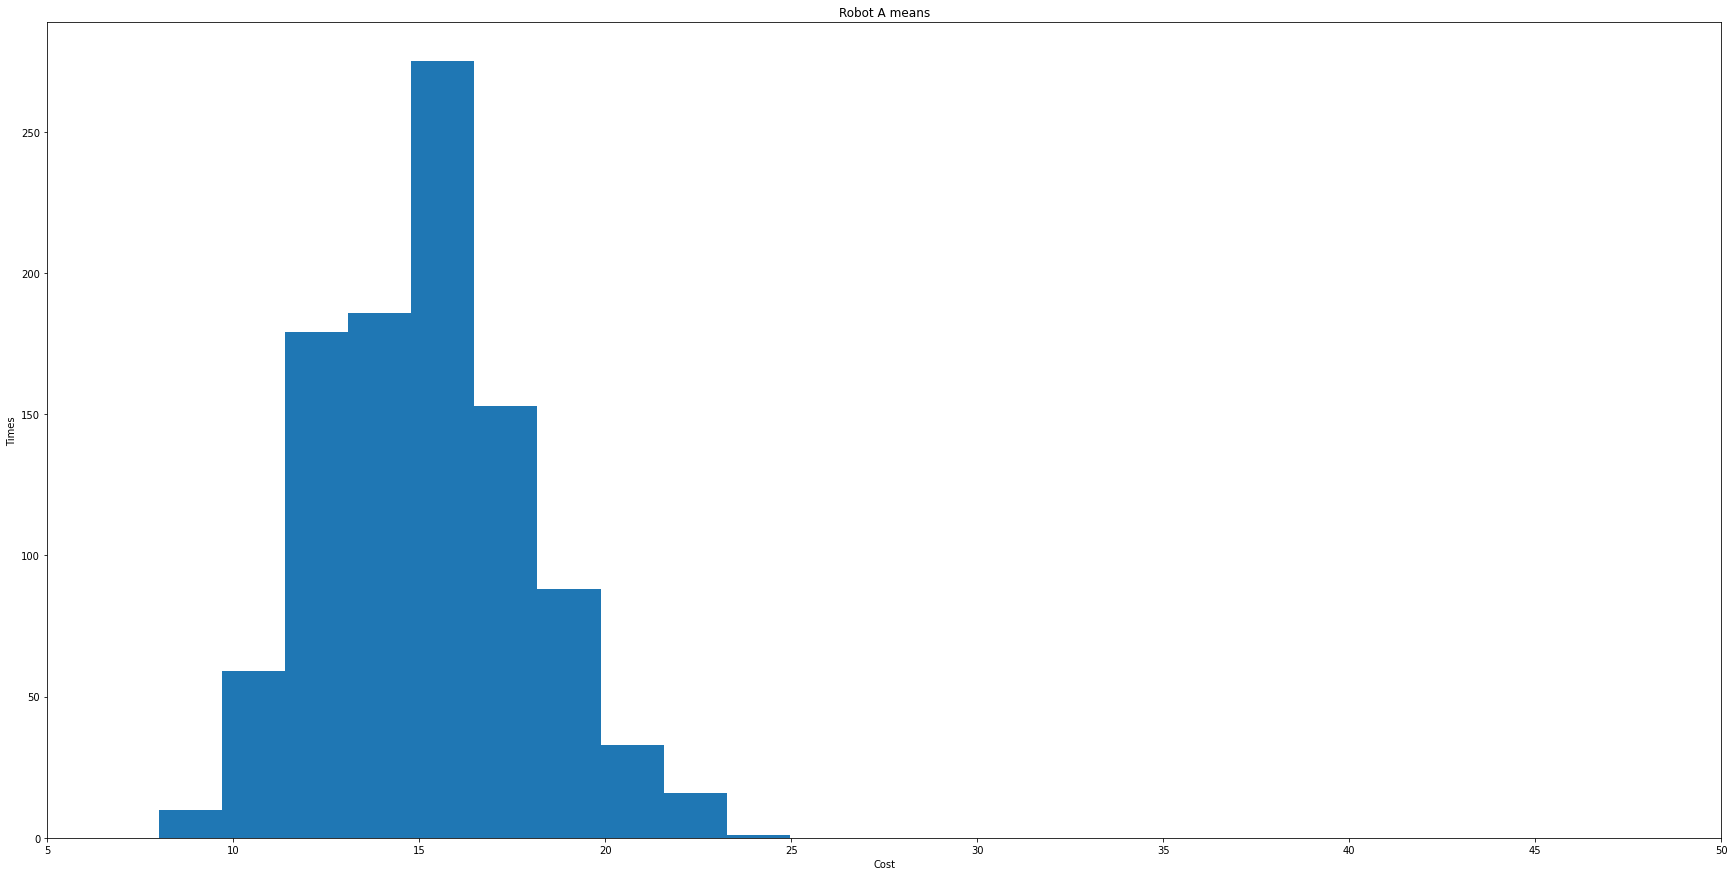

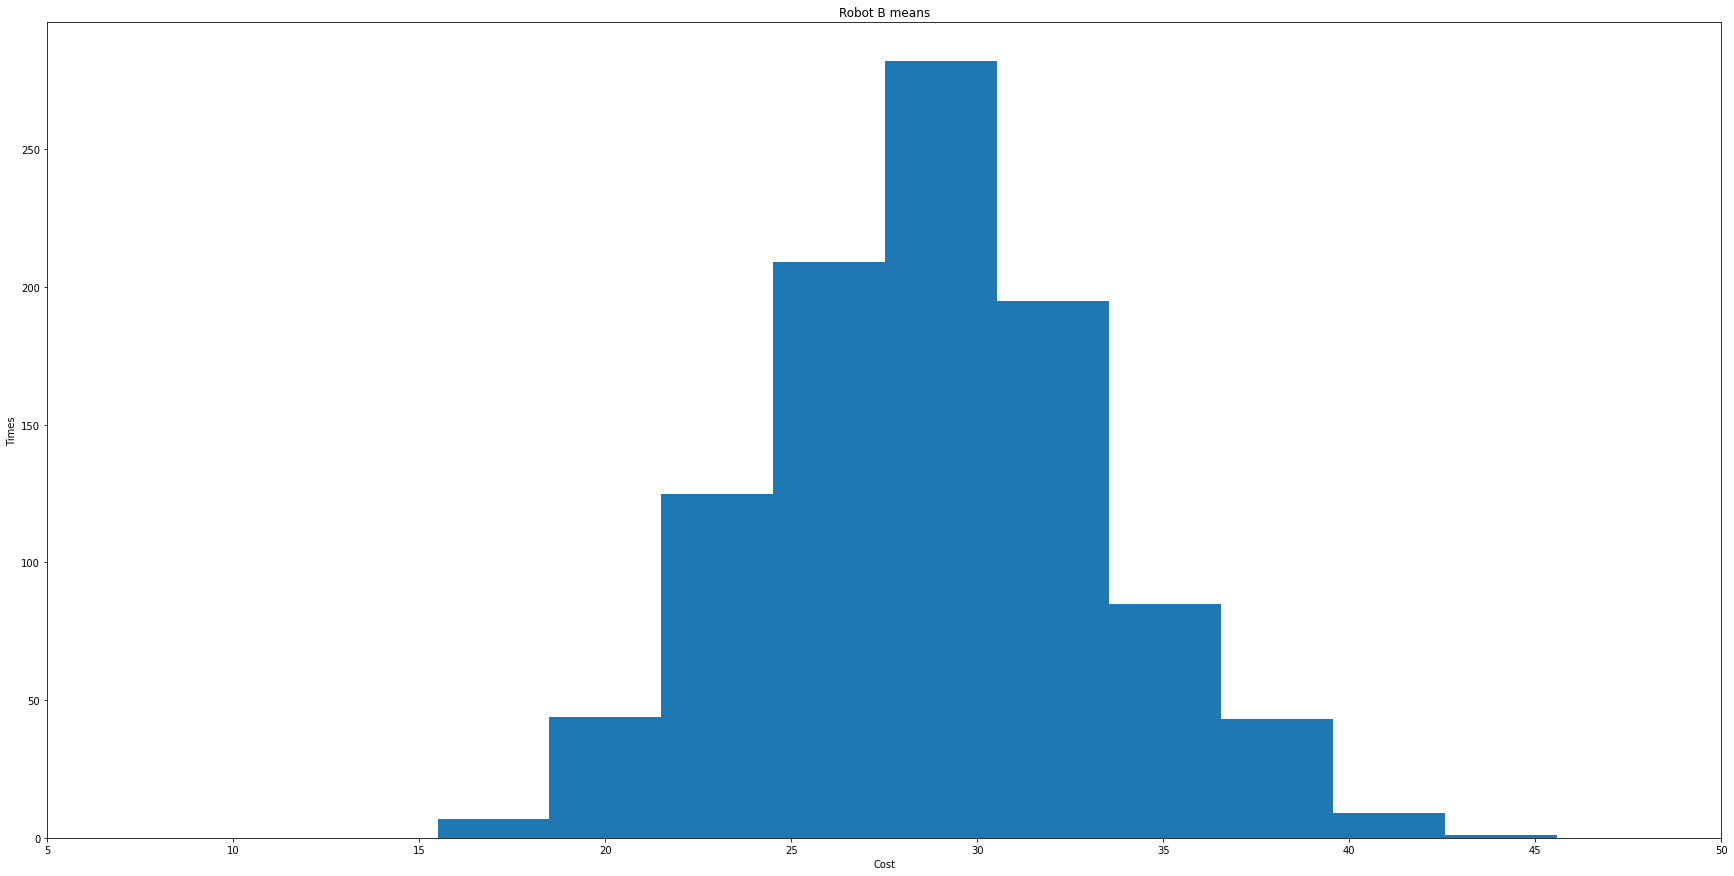

In [237]:
import numpy as np

base_cost_per_check = 5.0
metal_heating_cost: float = 1000.0
wrought_cost = 10.0


def cost_per_failed_check(minutes: float, total_cost: float) -> float:
    if minutes < 13:
        total_cost += wrought_cost
    else:
        total_cost += metal_heating_cost + wrought_cost
    return total_cost


def check_failure():
    return np.random.random(1) <= .2


def junk_check(minutes: float, total_cost: float = 0):
    total_cost: float = base_cost_per_check + total_cost
    if check_failure():
        total_cost = cost_per_failed_check(minutes, total_cost)
        junk_check(minutes, total_cost)
    return total_cost


cost_robot_a = [junk_check(check_minutes[0]) for check_minutes in df_robot_A.values.tolist()]
cost_robot_b = [junk_check(check_minutes[0]) for check_minutes in df_robot_B.values.tolist()]


def get_mean_cost(minutes_list):
    cost_list = [junk_check(check_minutes) for check_minutes in minutes_list]
    return sum(cost_list) / len(cost_list)


def get_mean_costs_by_trials(trials: int, minutes_list):
    costs = []
    for i in range(trials):
        costs.append(get_mean_cost(minutes_list))
    return costs


print("El coste por el robot A es de {0:.2f} euros por 889 Trastos".format(sum(cost_robot_a)))
mean_costs_robot_a = get_mean_costs_by_trials(1000, [time[0] for time in df_robot_A.values.tolist()])
plt.figure(figsize=(30, 15))
plt.xlabel('Cost')
plt.ylabel('Times')
plt.title("Robot A means")
plt.xlim(5,50)
_ = plt.hist(mean_costs_robot_a, bins=10)

print("El coste por el robot B es de {0:.2f} euros por 912 junks".format(sum(cost_robot_b)))
mean_costs_robot_b = get_mean_costs_by_trials(1000, [time[0] for time in df_robot_B.values.tolist()])
plt.figure(figsize=(30, 15))
plt.xlabel('Cost')
plt.ylabel('Times')
plt.title("Robot B means")
plt.xlim(5,50)
_ = plt.hist(mean_costs_robot_b, bins=10)

### Conclusiones pregunta 2

El robot que minimiza los costes de producción es claramente el robot A. En el histograma con 1000 intentos podemos ver claramente que nunca sobrepasa un coste por inspecciones de 25 euros de media y lo más común es que cueste unos 15 euros.

El robot B por el contrario puede sobrepasar los 40 euros de media y lo más común es que las inspecciones le salgan por alrededor de 30 euros.

## Pregunta 3

* ¿Cuál es el coste medio de fabricación por Trasto si usamos inspectores humanos que siempre tardan más de 20 minutos en inspeccionar un Trasto? Una inspección humana también cuesta 5 euros.

El coste medio por trasto con inspecciones humanas es de 1216.73 euros


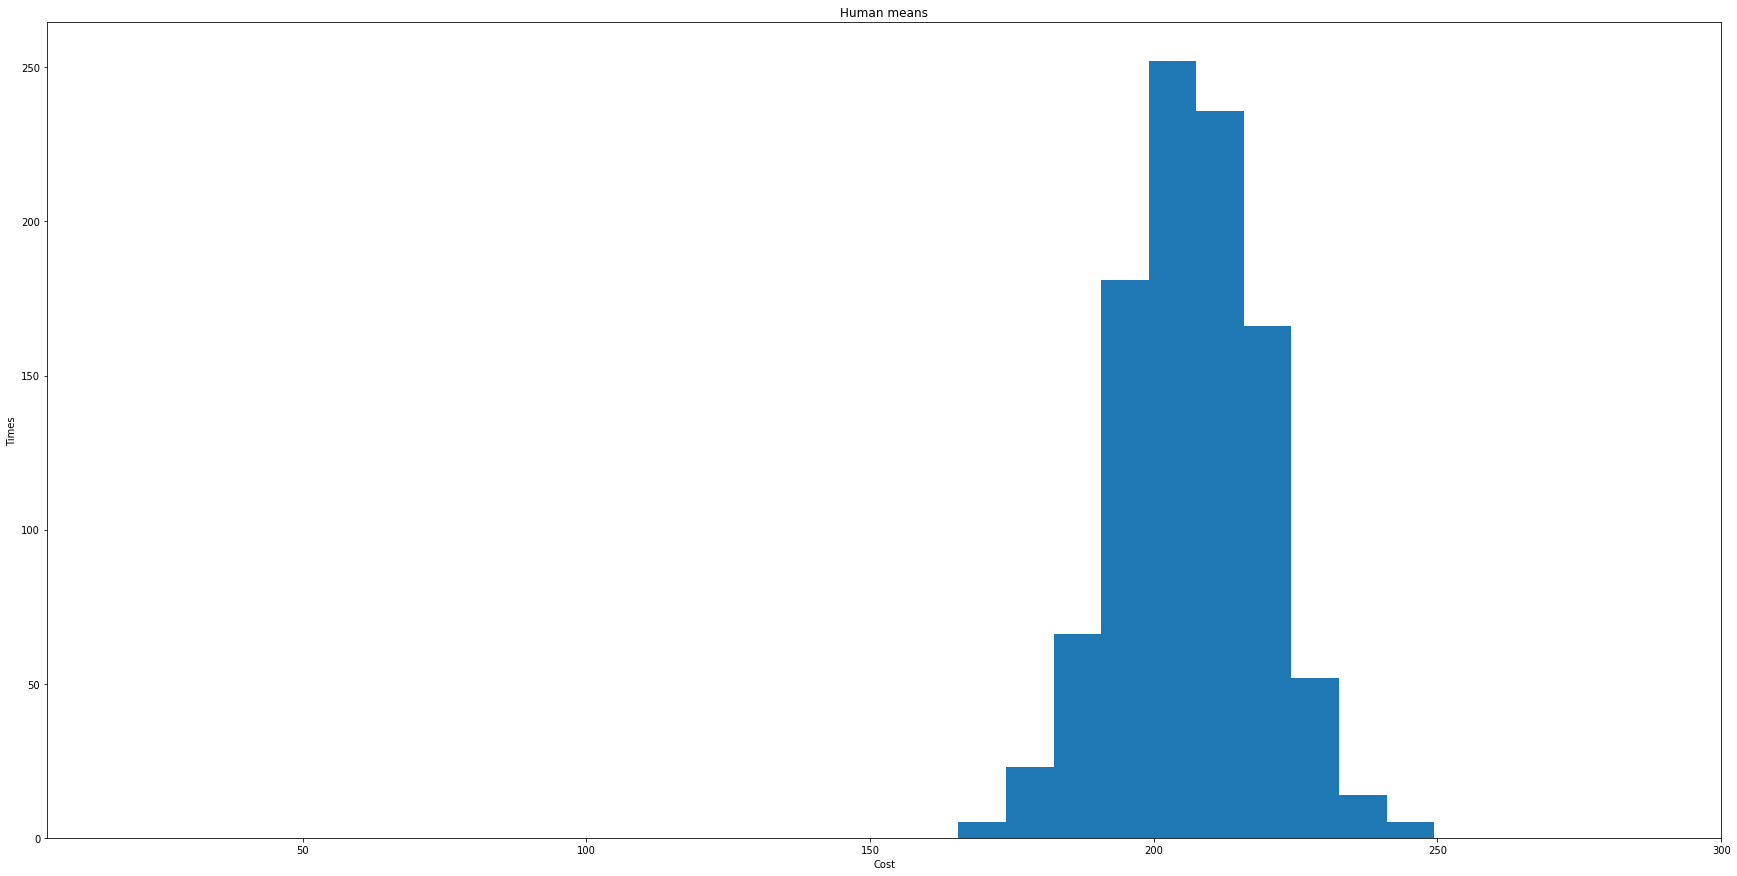

In [238]:
human_checks = [20.0 for i in range(1000)]

human_means_cost = get_mean_costs_by_trials(1000, human_checks)
plt.figure(figsize=(30, 15))
plt.xlabel('Cost')
plt.ylabel('Times')
plt.title("Human means")
plt.xlim(5,300)
_ = plt.hist(human_means_cost, bins=10)

print("El coste medio por trasto con inspecciones humanas es de {0:.2f} euros".format(sum(human_means_cost) / len(human_means_cost) + (1000 + 10)))


¿Cuál es el coste medio de fabricación por Trasto si usamos el robot A?

In [239]:
print("El coste medio por Trasto con el robot A es de {0:.2f} euros".format(sum(mean_costs_robot_a) / len(mean_costs_robot_a) + (1000 + 10)))

El coste medio por Trasto con el robot A es de 1025.11 euros


¿Cuál es el coste medio de fabricación por Trasto si usamos el robot B?


In [240]:
print("El coste medio por Trasto con el robot B es de {0:.2f} euros".format(sum(mean_costs_robot_b) / len(mean_costs_robot_b) + (1000 + 10)))

El coste medio por Trasto con el robot B es de 1038.74 euros
